In [34]:
import sys
import cv2
import os
import subprocess
import scipy.io.wavfile
import math
########## PARAMETERS ##########
BUFFER_SIZE = 60
WIDTH = 1280
HEIGHT = 720
SAMPLING_SIZE = 125 * 2
########## PARAMETERS ##########

In [87]:
def extractVideo(video_path, video_name, output_path):
    video_counter = 0
    frame_counter = 0
    whole_frame_counter = 0
    cap = cv2.VideoCapture(video_path)
    ret,frame = cap.read()
    HEIGHT = frame.shape[0]
    WIDTH = frame.shape[1]
    video_name = video_name[:-4]
    output_path = output_path + video_name + "vid"
    print("W: ",WIDTH)
    print("H: ",HEIGHT)
#     output_path = output_path + "vid"
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path+ str(video_counter) + '.mp4',fourcc, 20.0, (WIDTH,HEIGHT))
#             output = cv2.VideoWriter(output_path + str(video_counter) + '.mp4',fourcc, 20.0, (WIDTH,HEIGHT))
    while(True):
        if(frame_counter != 0):
            ret, frame = cap.read()
        if (ret == True):
            out.write(frame)
            frame_counter += 1
            whole_frame_counter += 1
        else: 
            print("end")
            break
        if (frame_counter == BUFFER_SIZE): 
            print(video_counter,':',frame_counter)
            video_counter += 1
            frame_counter = 0
            out = cv2.VideoWriter(output_path + str(video_counter) + '.mp4',fourcc, 20.0, (WIDTH,HEIGHT))
    if(frame_counter != 0):
        print('deleting: ', output_path + str(video_counter) + '.mp4')
        if os.path.exists(output_path + str(video_counter) + '.mp4'):
            os.remove(output_path + str(video_counter) + '.mp4')
    cap.release()
    print("done extracting video: ", video_path)
    print("total amount of frames: ", whole_frame_counter)
extractVideo('GOPR0248.MP4','GOPR0248.MP4','')

W:  1920
H:  1080
0 : 60
1 : 60
2 : 60
end
deleting:  GOPR0248vid3.mp4
done extracting video:  GOPR0248.MP4
total amount of frames:  223


In [21]:
def extractAudio(video_path, video_name, output_path):
    video_name = video_name[:-4]
    output_path = video_path + video_name
    command = "ffmpeg -i " + video_path + video_name + " -ab 160k -ac 2 -ar 44100 -vn " + output_path + "aud_tmp" + ".mp3"
    audio_counter = 0
    

In [6]:
# command = "ffmpeg -i GOPR0240.MP4 -r 30 output.wav"
# command = "ffmpeg -i GOPR0240.MP4 -ab 160k -ac 2 -ar 40000 output40k.mp3"
command = "ffmpeg -i GOPR0240.MP4 outputb.mp3"
subprocess.call(command, shell=True)
# rate2, data2 = scipy.io.wavfile.read('output40k.mp3')
# print (rate2)
# print (data2.shape)

1

In [ ]:
command = "2"
subprocess.call(command, shell=True)
rate, data = scipy.io.wavfile.read('output11.mp3')
print (rate)
print (data.shape)

In [35]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def extractAudio(video_path, video_name, output_folder_path):
    video = video_path + video_name
    video_name = video_name[:-4]
    snd_output = output_folder_path + video_name + "aud" + ".mp3"
    print("writing audio: ", snd_output)
    command = "ffmpeg -i " + video + " " + snd_output
    print(command)
    subprocess.call(command, shell=True)
    sns.set()
    print("reading from: ",snd_output)
    snd = parselmouth.Sound(snd_output)
    print((snd.values.T).shape)
    intensity = snd.to_intensity()
    int_list = intensity.values.T
#     if os.path.exists(snd_output):
#         print("deleting audio: ", snd_output)
#         os.remove(snd_output)
    # WRITE INTENSITY
    intensity_count = 0
    index = 0
    print(int_list.shape)
    while(True):
        if(index >= int_list.shape[0]):
            break
        output_full = output_folder_path + 'intensityfull' + str(intensity_count) + '.txt'
        with open(output_full, "w") as text_file:
            print('writing intensity: ', output_full)
            for i in range (SAMPLING_SIZE):
                if(index >= int_list.shape[0]):
                    break
                text_file.write(str(int_list[index,0]))
                text_file.write("\n")
                index += 1
                
        intensity_count += 1
        
        if((index-1) % SAMPLING_SIZE == 0):
            intensity_count += 1
            output_full = output_folder_path + 'intensity' + str(intensity_count) + '.txt'
    if((index-1) % SAMPLING_SIZE != 0):
        print('deleting: ', output_folder_path + 'intensity' + str(intensity_count) + '.txt')
        if os.path.exists(output_folder_path + 'intensity' + str(intensity_count) + '.txt'):
            os.remove(output_folder_path + 'intensity' + str(intensity_count) + '.txt')
    print('done')
    return

In [37]:
extractAudio("","GOPR0240.MP4","")

writing audio:  GOPR0240aud.mp3
ffmpeg -i GOPR0240.MP4 GOPR0240aud.mp3
reading from:  GOPR0240aud.mp3
(342671, 2)
(885, 1)
writing intensity:  intensityfull0.txt
writing intensity:  intensityfull1.txt
writing intensity:  intensityfull2.txt
writing intensity:  intensityfull3.txt
writing intensity:  intensityfull4.txt
writing intensity:  intensityfull5.txt
writing intensity:  intensityfull6.txt
writing intensity:  intensityfull7.txt
writing intensity:  intensityfull8.txt
writing intensity:  intensityfull9.txt
writing intensity:  intensityfull10.txt
writing intensity:  intensityfull11.txt
writing intensity:  intensityfull12.txt
writing intensity:  intensityfull13.txt
writing intensity:  intensityfull14.txt
deleting:  intensity15.txt
done


In [3]:
def main():
    input_folder_path = input("Enter input folder name: ")
    if(input_folder_path == ''):
        input_folder_path = '.'
    input_folder_path =  input_folder_path + "/"
    output_folder_path = input("Enter output folder name")
    if(output_folder_path == ''):
        output_folder_path = '.'
    output_folder_path = output_folder_path + "/"
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    video_names = os.listdir(input_folder_path)
    video_paths = [input_folder_path + video_name for video_name in video_names]
    for i in range (len(video_paths)):
#         extractVideo(video_paths[i], video_names[i], output_folder_path)
        extractVideo(video_paths[i], video_names[i], output_folder_path)
        extractAudio(video_paths[i], video_names[i], output_folder_path)
    

In [3]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 100
# Show nicely large images in this notebook
snd1 = parselmouth.Sound("output30.wav")
snd2 = parselmouth.Sound("output40k.wav")
plt.figure()
plt.plot(snd1.xs(), snd1.values.T)
plt.xlim([snd1.xmin, snd1.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()
# or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

<Figure size 640x480 with 1 Axes>

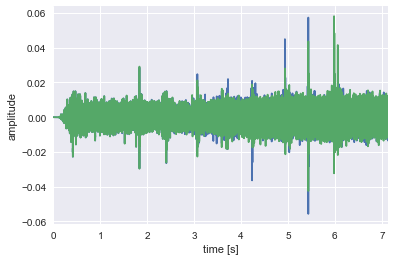

In [6]:
snd3 = parselmouth.Sound("output.mp3")
plt.figure()
plt.plot(snd3.xs(), snd3.values.T)
plt.xlim([snd3.xmin, snd3.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

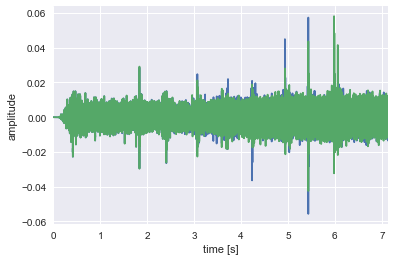

(342671, 2)


In [4]:
snd3 = parselmouth.Sound("outputb.mp3")
plt.figure()
plt.plot(snd3.xs(), snd3.values.T)
plt.xlim([snd3.xmin, snd3.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()
print((snd3.values.T).shape)

In [5]:
sns.set()
# Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 100
# Show nicely large images in this notebook
snd1 = parselmouth.Sound("output30.wav")
snd2 = parselmouth.Sound("output40k.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

NameError: name 'snd' is not defined

<Figure size 600x400 with 0 Axes>

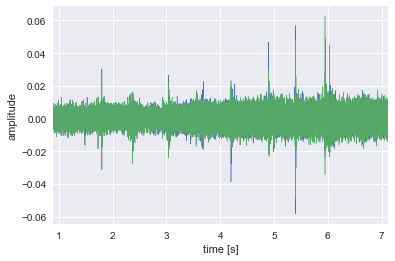

In [10]:
snd_part = snd.extract_part(from_time=0.9, preserve_times=True)
plt.figure()
plt.plot(snd_part.xs(), snd_part.values.T, linewidth=0.5)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

In [9]:
print(snd3.get_time_step())

2.0833333333333333e-05


(885, 1)


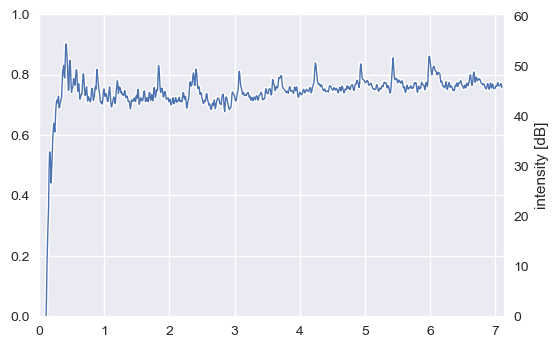

In [6]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")
intensity = snd3.to_intensity()
print(intensity.values.T.shape)
# spectrogram = snd3.to_spectrogram()
plt.figure()
# draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd3.xmin, snd3.xmax])
plt.show()

In [41]:
import numpy as np
import cv2

cap = cv2.VideoCapture("GOPR0240.MP4")


frame_counter = 0
while(True):
    ret, frame = cap.read()
    if (ret == True):
        frame_counter += 1
    else: 
        print("end")
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
print(frame_counter)
cap.release()
cv2.destroyAllWindows()

end
213
